<a href="https://colab.research.google.com/github/moodv/data-analytics-portfolio/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING DATASET**

In [1]:
import pandas as pd

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/moodv/data-analytics-portfolio/refs/heads/main/Project1-Retail-Sales-Dashboard/data/sales.csv"
df = pd.read_csv(url)
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.info()
df.describe(include="all")
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

np.int64(0)

# **Data Engineering & EDA**

In [4]:
# Clean + standardize columns and parse types
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'pct')

# Drop constant column
df.drop(columns=['gross_margin_percentage'], inplace=True, errors='ignore')

# Parse date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract components
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# Parse time and create bucket
df['time'] = pd.to_datetime(df['time'], format='%I:%M:%S %p', errors='coerce')
df['hour'] = df['time'].dt.hour
df['time_of_day'] = df['hour'].map(lambda h: 'Morning' if h < 12 else ('Afternoon' if h < 17 else 'Evening'))

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     1000 non-null   object        
 1   branch         1000 non-null   object        
 2   city           1000 non-null   object        
 3   customer_type  1000 non-null   object        
 4   gender         1000 non-null   object        
 5   product_line   1000 non-null   object        
 6   unit_price     1000 non-null   float64       
 7   quantity       1000 non-null   int64         
 8   tax_5pct       1000 non-null   float64       
 9   sales          1000 non-null   float64       
 10  date           1000 non-null   datetime64[ns]
 11  time           1000 non-null   datetime64[ns]
 12  payment        1000 non-null   object        
 13  cogs           1000 non-null   float64       
 14  gross_income   1000 non-null   float64       
 15  rating         1000 no

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5pct,sales,...,time,payment,cogs,gross_income,rating,day,month,weekday,hour,time_of_day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,5,1,Saturday,13,Afternoon
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,1900-01-01 10:29:00,Cash,76.40,3.8200,9.6,8,3,Friday,10,Morning
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,1900-01-01 13:23:00,Credit card,324.31,16.2155,7.4,3,3,Sunday,13,Afternoon
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,1900-01-01 20:33:00,Ewallet,465.76,23.2880,8.4,27,1,Sunday,20,Evening
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,1900-01-01 10:37:00,Ewallet,604.17,30.2085,5.3,8,2,Friday,10,Morning


In [5]:
# Basic numeric stats
display(df.describe(include='number').T)

# Categorical distributions
for col in ['branch', 'city', 'customer_type', 'gender', 'product_line', 'payment', 'time_of_day', 'weekday']:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts(normalize=True).round(3) * 100)

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())


,count,mean,std,min,25%,50%,75%,max
unit_price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
tax_5pct,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
sales,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
cogs,1000.0,307.587380,234.176510,10.1700,118.497500,241.760,448.90500,993.00
gross_income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
rating,1000.0,6.972700,1.718580,4.0000,5.500000,7.000,8.50000,10.00
day,1000.0,15.256000,8.693563,1.0000,8.000000,15.000,23.00000,31.00
month,1000.0,1.993000,0.835254,1.0000,1.000000,2.000,3.00000,3.00
hour,1000.0,14.910000,3.186857,10.0000,12.000000,15.000,18.00000,20.00



--- BRANCH ---
branch
Alex     34.0
Cairo    33.2
Giza     32.8
Name: proportion, dtype: float64

--- CITY ---
city
Yangon       34.0
Mandalay     33.2
Naypyitaw    32.8
Name: proportion, dtype: float64

--- CUSTOMER_TYPE ---
customer_type
Member    56.5
Normal    43.5
Name: proportion, dtype: float64

--- GENDER ---
gender
Female    57.1
Male      42.9
Name: proportion, dtype: float64

--- PRODUCT_LINE ---
product_line
Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: proportion, dtype: float64

--- PAYMENT ---
payment
Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: proportion, dtype: float64

--- TIME_OF_DAY ---
time_of_day
Afternoon    45.4
Evening      35.5
Morning      19.1
Name: proportion, dtype: float64

--- WEEKDAY ---
weekday
Saturday     16.4
Tuesday      15.8
Wednesday    14.3
Friday       13.9
Thursday     13.8
Sun

In [6]:
# Create clean mappings
branch_map = {
    "Alex": "Branch A",
    "Cairo": "Branch B",
    "Giza": "Branch C"
}

city_map = {
    "Yangon": "Cairo",
    "Mandalay": "Giza",
    "Naypyitaw": "Alexandria"
}

# Apply mappings
df['branch'] = df['branch'].map(branch_map)
df['city'] = df['city'].map(city_map)

# Quick check
print(df[['branch', 'city']].head(10))


     branch        city
0  Branch A       Cairo
1  Branch C  Alexandria
2  Branch A       Cairo
3  Branch A       Cairo
4  Branch A       Cairo
5  Branch C  Alexandria
6  Branch A       Cairo
7  Branch C  Alexandria
8  Branch A       Cairo
9  Branch B        Giza


In [7]:
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5pct,sales,...,time,payment,cogs,gross_income,rating,day,month,weekday,hour,time_of_day
0,750-67-8428,Branch A,Cairo,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1,5,1,Saturday,13,Afternoon
1,226-31-3081,Branch C,Alexandria,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,1900-01-01 10:29:00,Cash,76.40,3.8200,9.6,8,3,Friday,10,Morning
2,631-41-3108,Branch A,Cairo,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,1900-01-01 13:23:00,Credit card,324.31,16.2155,7.4,3,3,Sunday,13,Afternoon
3,123-19-1176,Branch A,Cairo,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,1900-01-01 20:33:00,Ewallet,465.76,23.2880,8.4,27,1,Sunday,20,Evening
4,373-73-7910,Branch A,Cairo,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,1900-01-01 10:37:00,Ewallet,604.17,30.2085,5.3,8,2,Friday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Branch C,Alexandria,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,1900-01-01 13:46:00,Ewallet,40.35,2.0175,6.2,29,1,Tuesday,13,Afternoon
996,303-96-2227,Branch B,Giza,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,1900-01-01 17:16:00,Ewallet,973.80,48.6900,4.4,2,3,Saturday,17,Evening
997,727-02-1313,Branch A,Cairo,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,1900-01-01 13:22:00,Cash,31.84,1.5920,7.7,9,2,Saturday,13,Afternoon
998,347-56-2442,Branch A,Cairo,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,1900-01-01 15:33:00,Cash,65.82,3.2910,4.1,22,2,Friday,15,Afternoon


# **Revenue & Profitability**

In [8]:
# Total Revenue
total_revenue = float(df['sales'].sum())
# Total Gross Income (Profit)
total_profit = float(df['gross_income'].sum())
# Average Sales per Transaction
avg_sales = float(df['sales'].mean())
# Profit Margin
profit_margin = float(total_profit / total_revenue * 100)

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit:  ${total_profit:,.2f}")
print(f"Average Sales per Transaction: ${avg_sales:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")

Total Revenue: $322,966.75
Total Profit:  $15,379.37
Average Sales per Transaction: $322.97
Profit Margin: 4.76%


# **Branch & City Prformance**

In [9]:
branch_perf = df.groupby('branch').agg(
    total_revenue = ('sales', 'sum'),
    total_profit = ('gross_income', 'sum'),
    avg_sales = ('sales', 'mean'),
    transactions = ('invoice_id', 'count')
).reset_index()

# Format for readability
branch_perf['total_revenue'] = branch_perf['total_revenue'].apply(lambda x: f"${x:,.2f}")
branch_perf['total_profit'] = branch_perf['total_profit'].apply(lambda x: f"${x:,.2f}")
branch_perf['avg_sales'] = branch_perf['avg_sales'].apply(lambda x: f"${x:,.2f}")
branch_perf['transactions'] = branch_perf['transactions'].apply(lambda x: f"{x:,}")

branch_perf


,branch,total_revenue,total_profit,avg_sales,transactions
0,Branch A,"$106,200.37","$5,057.16",$312.35,340
1,Branch B,"$106,197.67","$5,057.03",$319.87,332
2,Branch C,"$110,568.71","$5,265.18",$337.10,328


In [10]:
city_perf = df.groupby('city').agg(
    total_revenue = ('sales', 'sum'),
    total_profit = ('gross_income', 'sum'),
    avg_sales = ('sales', 'mean'),
    transactions = ('invoice_id', 'count')
).reset_index()

# Format
city_perf['total_revenue'] = city_perf['total_revenue'].apply(lambda x: f"${x:,.2f}")
city_perf['total_profit'] = city_perf['total_profit'].apply(lambda x: f"${x:,.2f}")
city_perf['avg_sales'] = city_perf['avg_sales'].apply(lambda x: f"${x:,.2f}")
city_perf['transactions'] = city_perf['transactions'].apply(lambda x: f"{x:,}")

city_perf


,city,total_revenue,total_profit,avg_sales,transactions
0,Alexandria,"$110,568.71","$5,265.18",$337.10,328
1,Cairo,"$106,200.37","$5,057.16",$312.35,340
2,Giza,"$106,197.67","$5,057.03",$319.87,332


📌 Key Insights

*   Branch C / Alexandria is the growth engine. You’d double down here: marketing, premium offers, loyalty programs. Customers are willing to spend more.

*   Branch A / Cairo is fragile. High traffic, low basket size → people shop often but cheap. Strategy: upselling & cross-selling.

*  Branch B / Giza is stagnant. Slightly better avg sale than Cairo but not enough transactions. It risks being irrelevant unless pushed.



# **Product Line Performance**

In [11]:
# Product line performance
product_perf = df.groupby("product_line").agg(
    total_revenue=("sales", "sum"),
    total_profit=("gross_income", "sum"),
    avg_sales=("sales", "mean"),
    transactions=("invoice_id", "count")
).reset_index()

# Format nicely
product_perf["total_revenue"] = product_perf["total_revenue"].map("${:,.2f}".format)
product_perf["total_profit"]  = product_perf["total_profit"].map("${:,.2f}".format)
product_perf["avg_sales"]     = product_perf["avg_sales"].map("${:,.2f}".format)

product_perf


,product_line,total_revenue,total_profit,avg_sales,transactions
0,Electronic accessories,"$54,337.53","$2,587.50",$319.63,170
1,Fashion accessories,"$54,305.89","$2,585.99",$305.09,178
2,Food and beverages,"$56,144.84","$2,673.56",$322.67,174
3,Health and beauty,"$49,193.74","$2,342.56",$323.64,152
4,Home and lifestyle,"$53,861.91","$2,564.85",$336.64,160
5,Sports and travel,"$55,122.83","$2,624.90",$332.07,166


In [12]:
# Pivot table for Branch vs Product Line
branch_product_perf = df.groupby(["branch", "product_line"]).agg(
    total_revenue=("sales", "sum"),
    total_profit=("gross_income", "sum"),
    avg_sales=("sales", "mean"),
    transactions=("invoice_id", "count")
).reset_index()

# Format nicely
branch_product_perf["total_revenue"] = branch_product_perf["total_revenue"].map("${:,.2f}".format)
branch_product_perf["total_profit"]  = branch_product_perf["total_profit"].map("${:,.2f}".format)
branch_product_perf["avg_sales"]     = branch_product_perf["avg_sales"].map("${:,.2f}".format)


branch_product_perf


,branch,product_line,total_revenue,total_profit,avg_sales,transactions
0,Branch A,Electronic accessories,"$18,317.11",$872.24,$305.29,60
1,Branch A,Fashion accessories,"$16,332.51",$777.74,$320.25,51
2,Branch A,Food and beverages,"$17,163.10",$817.29,$295.92,58
3,Branch A,Health and beauty,"$12,597.75",$599.89,$268.04,47
4,Branch A,Home and lifestyle,"$22,417.20","$1,067.49",$344.88,65
5,Branch A,Sports and travel,"$19,372.70",$922.51,$328.35,59
6,Branch B,Electronic accessories,"$17,051.44",$811.97,$310.03,55
7,Branch B,Fashion accessories,"$16,413.32",$781.59,$264.73,62
8,Branch B,Food and beverages,"$15,214.89",$724.52,$304.30,50
9,Branch B,Health and beauty,"$19,980.66",$951.46,$376.99,53




📌 Key Insights

* Branch C is the clear leader: stronger revenues, higher ticket sizes, and more consistent profits.

* Branch A lags: especially in “Health & beauty” and “Food & beverages.”

* Branch B is polarized: “Health & beauty” shines, but “Fashion accessories” drags it down.







# **Customer Type Analysis**

In [13]:
# Customer type performance
customer_perf = df.groupby("customer_type").agg(
    total_revenue=("sales", "sum"),
    total_profit=("gross_income", "sum"),
    avg_sales=("sales", "mean"),
    transactions=("invoice_id", "count")
).reset_index()

# Format for readability
customer_perf["total_revenue"] = customer_perf["total_revenue"].map("${:,.2f}".format)
customer_perf["total_profit"] = customer_perf["total_profit"].map("${:,.2f}".format)
customer_perf["avg_sales"] = customer_perf["avg_sales"].map("${:,.2f}".format)

customer_perf


,customer_type,total_revenue,total_profit,avg_sales,transactions
0,Member,"$189,694.76","$9,033.08",$335.74,565
1,Normal,"$133,271.98","$6,346.28",$306.37,435


In [14]:
# Payment method performance
payment_perf = df.groupby("payment").agg(
    total_revenue=("sales", "sum"),
    total_profit=("gross_income", "sum"),
    avg_sales=("sales", "mean"),
    transactions=("invoice_id", "count")
).reset_index()

# Format for readability
payment_perf["total_revenue"] = payment_perf["total_revenue"].map("${:,.2f}".format)
payment_perf["total_profit"] = payment_perf["total_profit"].map("${:,.2f}".format)
payment_perf["avg_sales"] = payment_perf["avg_sales"].map("${:,.2f}".format)

payment_perf


,payment,total_revenue,total_profit,avg_sales,transactions
0,Cash,"$112,206.57","$5,343.17",$326.18,344
1,Credit card,"$100,767.07","$4,798.43",$324.01,311
2,Ewallet,"$109,993.11","$5,237.77",$318.82,345



📌 Key Insights

* Customers are split almost evenly between Cash and Ewallet → both are dominant.

* Credit cards lag behind → less popular, maybe due to fees or trust issues.

* Ewallet users are numerous but spend slightly less per purchase → great adoption, but not maximizing value.

* Business could encourage higher basket size on Ewallet (bundle promos, cashback, etc.).

# **Time-Based Analysis**

In [15]:
# Weekday performance
weekday_perf = df.groupby("weekday").agg(
    total_revenue=("sales", "sum"),
    total_profit=("gross_income", "sum"),
    avg_sales=("sales", "mean"),
    transactions=("invoice_id", "count")
).reset_index()

# Sort weekdays in order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_perf["weekday"] = pd.Categorical(weekday_perf["weekday"], categories=weekday_order, ordered=True)
weekday_perf = weekday_perf.sort_values("weekday")

# Time of day performance
timeofday_perf = df.groupby("time_of_day").agg(
    total_revenue=("sales", "sum"),
    total_profit=("gross_income", "sum"),
    avg_sales=("sales", "mean"),
    transactions=("invoice_id", "count")
).reset_index()

# Format for readability
for df_ in [weekday_perf, timeofday_perf]:
    df_["total_revenue"] = df_["total_revenue"].map("${:,.2f}".format)
    df_["total_profit"] = df_["total_profit"].map("${:,.2f}".format)
    df_["avg_sales"] = df_["avg_sales"].map("${:,.2f}".format)

weekday_perf, timeofday_perf


(     weekday total_revenue total_profit avg_sales  transactions
 1     Monday    $37,899.08    $1,804.72   $303.19           125
 5    Tuesday    $51,482.25    $2,451.54   $325.84           158
 6  Wednesday    $43,731.14    $2,082.43   $305.81           143
 4   Thursday    $45,349.25    $2,159.49   $328.62           138
 0     Friday    $43,926.34    $2,091.73   $316.02           139
 2   Saturday    $56,120.81    $2,672.42   $342.20           164
 3     Sunday    $44,457.89    $2,117.04   $334.27           133,
   time_of_day total_revenue total_profit avg_sales  transactions
 0   Afternoon   $148,023.34    $7,048.73   $326.04           454
 1     Evening   $113,144.60    $5,387.84   $318.72           355
 2     Morning    $61,798.81    $2,942.80   $323.55           191)

📌 Key Insights

* Saturday dominates. Business should staff heavier on weekends, push promotions on weak Mondays.

* Focus campaigns & promotions in the afternoon peak. Morning underperformance could be nudged with breakfast/morning bundles.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     1000 non-null   object        
 1   branch         1000 non-null   object        
 2   city           1000 non-null   object        
 3   customer_type  1000 non-null   object        
 4   gender         1000 non-null   object        
 5   product_line   1000 non-null   object        
 6   unit_price     1000 non-null   float64       
 7   quantity       1000 non-null   int64         
 8   tax_5pct       1000 non-null   float64       
 9   sales          1000 non-null   float64       
 10  date           1000 non-null   datetime64[ns]
 11  time           1000 non-null   datetime64[ns]
 12  payment        1000 non-null   object        
 13  cogs           1000 non-null   float64       
 14  gross_income   1000 non-null   float64       
 15  rating         1000 no

In [17]:
# Convert day and month to integers
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)

# Rebuild proper datetime with dummy year 2019
df['rfm_date'] = pd.to_datetime(dict(year=2019, month=df['month'], day=df['day']))

# Reference date
ref_date = df['rfm_date'].max()

# Group by invoice_id
rfm = df.groupby('invoice_id').agg(
    recency=('rfm_date', lambda x: (ref_date - x.max()).days),
    frequency=('rfm_date', 'count'),   # counts transactions per invoice_id
    monetary=('sales', 'sum')
).reset_index()

# RFM scoring
rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4])

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

rfm.head()


,invoice_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,101-17-6199,17,1,336.5565,4,1,3,413
1,101-81-4070,72,1,131.9220,1,1,2,112
2,102-06-2002,10,1,132.5625,4,1,2,412
3,102-77-2261,25,1,480.0285,3,1,4,314
4,105-10-6182,31,1,45.1080,3,1,1,311


In [18]:
# Function to map RFM into segments
def rfm_segment(row):
    if row['r_score'] == 4 and row['f_score'] == 4:
        return 'champion'
    elif row['r_score'] >= 3 and row['f_score'] >= 3:
        return 'loyal'
    elif row['r_score'] <= 2 and row['f_score'] <= 2:
        return 'at_risk'
    elif row['m_score'] <= 2:
        return 'low_value'
    else:
        return 'others'

# Apply segmentation
rfm['segment'] = rfm.apply(rfm_segment, axis=1)

# Check results
rfm.head(25)


,invoice_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,101-17-6199,17,1,336.5565,4,1,3,413,others
1,101-81-4070,72,1,131.9220,1,1,2,112,at_risk
2,102-06-2002,10,1,132.5625,4,1,2,412,low_value
3,102-77-2261,25,1,480.0285,3,1,4,314,others
4,105-10-6182,31,1,45.1080,3,1,1,311,low_value
5,105-31-1824,57,1,510.9720,2,1,4,214,at_risk
6,106-35-6779,3,1,93.1140,4,1,1,411,low_value
7,109-28-2512,82,1,614.9430,1,1,4,114,at_risk
8,109-86-4363,44,1,441.5880,3,1,3,313,others
9,110-05-6330,5,1,248.4090,4,1,2,412,low_value


In [19]:
# Aggregate RFM metrics by segment
segment_summary = rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'sum', 'count']
}).round(2)

# Clean column names
segment_summary.columns = ['recency_avg', 'frequency_avg', 'monetary_avg', 'monetary_total', 'transactions']
segment_summary = segment_summary.sort_values(by='monetary_total', ascending=False)

segment_summary


,recency_avg,frequency_avg,monetary_avg,monetary_total,transactions
segment,,,,,
others,45.18,1.0,515.07,126706.96,246
at_risk,65.59,1.0,327.73,81604.62,249
loyal,25.45,1.0,313.50,62386.58,199
low_value,43.65,1.0,131.01,32753.41,250
champion,10.20,1.0,348.49,19515.17,56


/tmp/ipython-input-2794557995.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


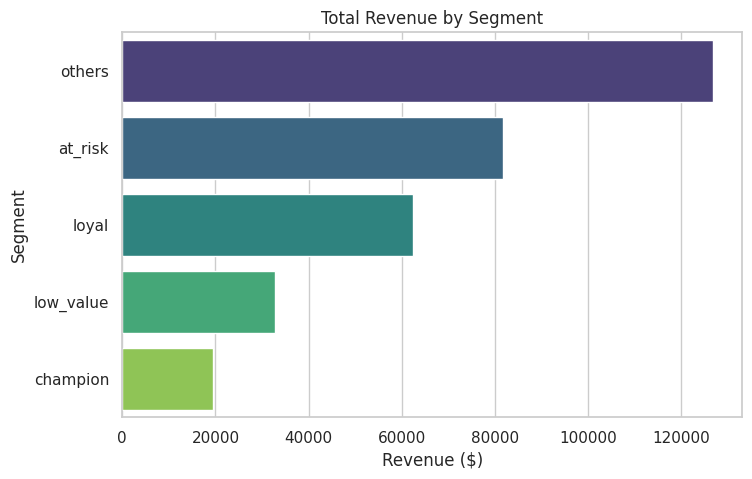

/tmp/ipython-input-2794557995.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


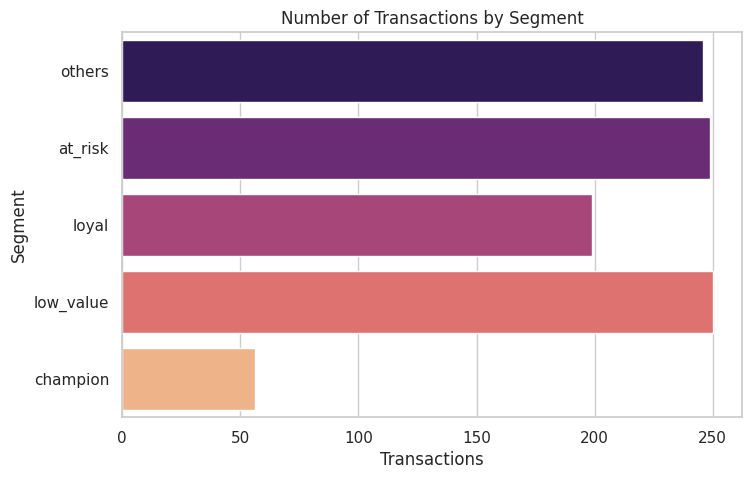

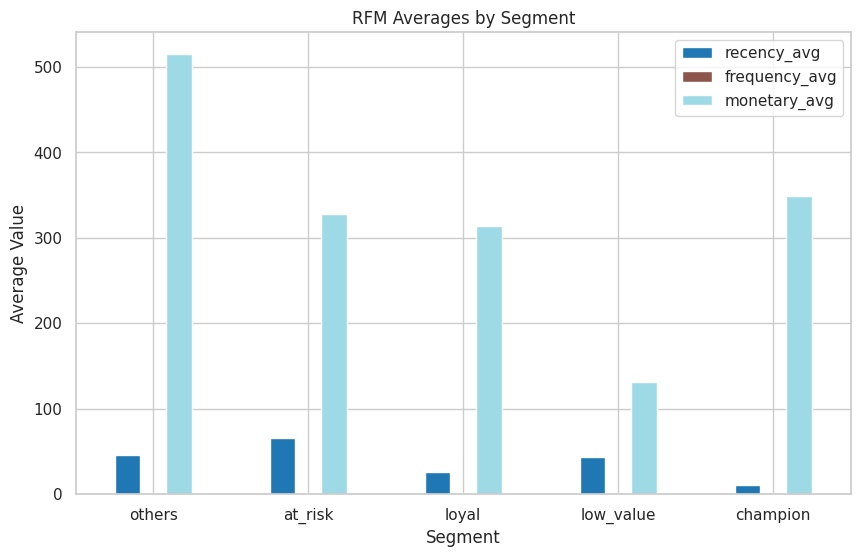

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# --- 1. Total Revenue per Segment ---
plt.figure(figsize=(8,5))
sns.barplot(
    x='monetary_total',
    y=segment_summary.index,
    data=segment_summary,
    palette='viridis'
)
plt.title('Total Revenue by Segment')
plt.xlabel('Revenue ($)')
plt.ylabel('Segment')
plt.show()

# --- 2. Transaction Count per Segment ---
plt.figure(figsize=(8,5))
sns.barplot(
    x='transactions',
    y=segment_summary.index,
    data=segment_summary,
    palette='magma'
)
plt.title('Number of Transactions by Segment')
plt.xlabel('Transactions')
plt.ylabel('Segment')
plt.show()

# --- 3. Average Recency, Frequency, Monetary per Segment ---
segment_summary[['recency_avg','frequency_avg','monetary_avg']].plot(
    kind='bar',
    figsize=(10,6),
    colormap='tab20'
)
plt.title('RFM Averages by Segment')
plt.xlabel('Segment')
plt.xticks(ticks=range(len(segment_summary)), labels=segment_summary.index, rotation=0)
plt.ylabel('Average Value')
plt.show()
